In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
import seaborn as sns

import plotly.express as px
from plotly.offline import init_notebook_mode, iplot, plot

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


## EDA(Exploratory Data Analysis)

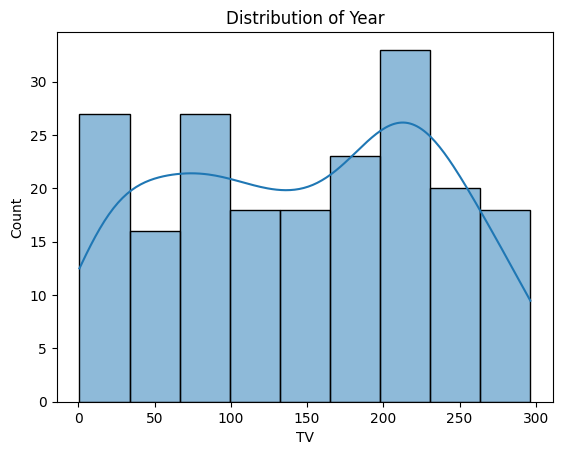

In [5]:
sns.histplot(data=df,x='TV',kde=True)
plt.title('Distribution of TV')
plt.show()

In [12]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


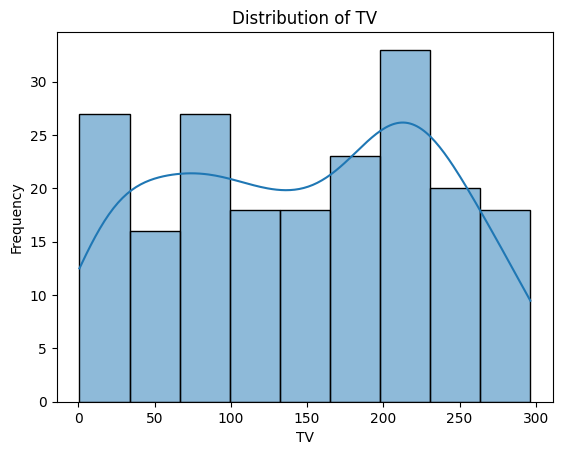

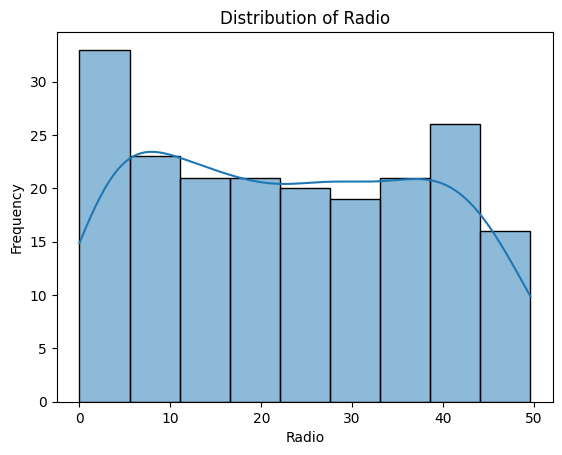

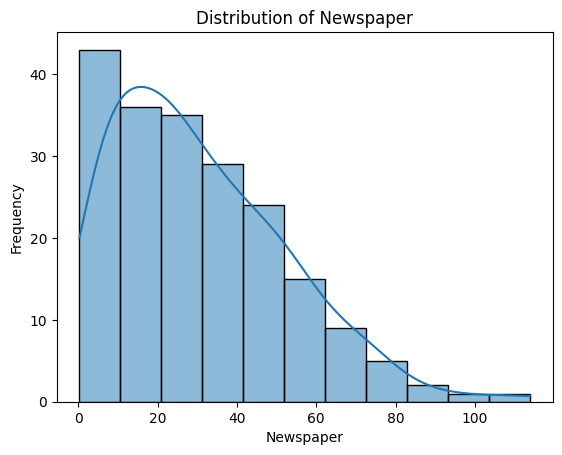

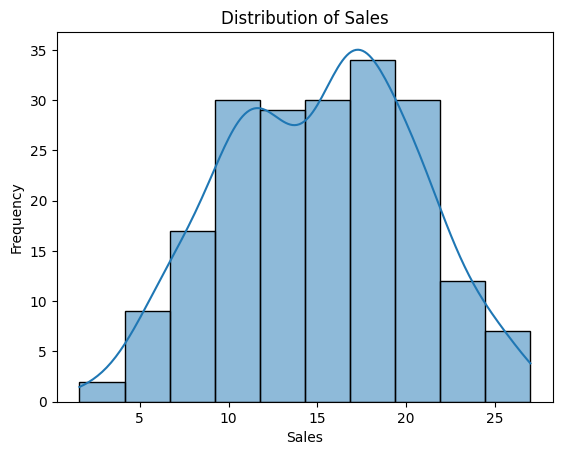

In [13]:
# Distribution of each column
for column in ['TV', 'Radio', 'Newspaper', 'Sales']:
    sns.histplot(df[column], kde=True)
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

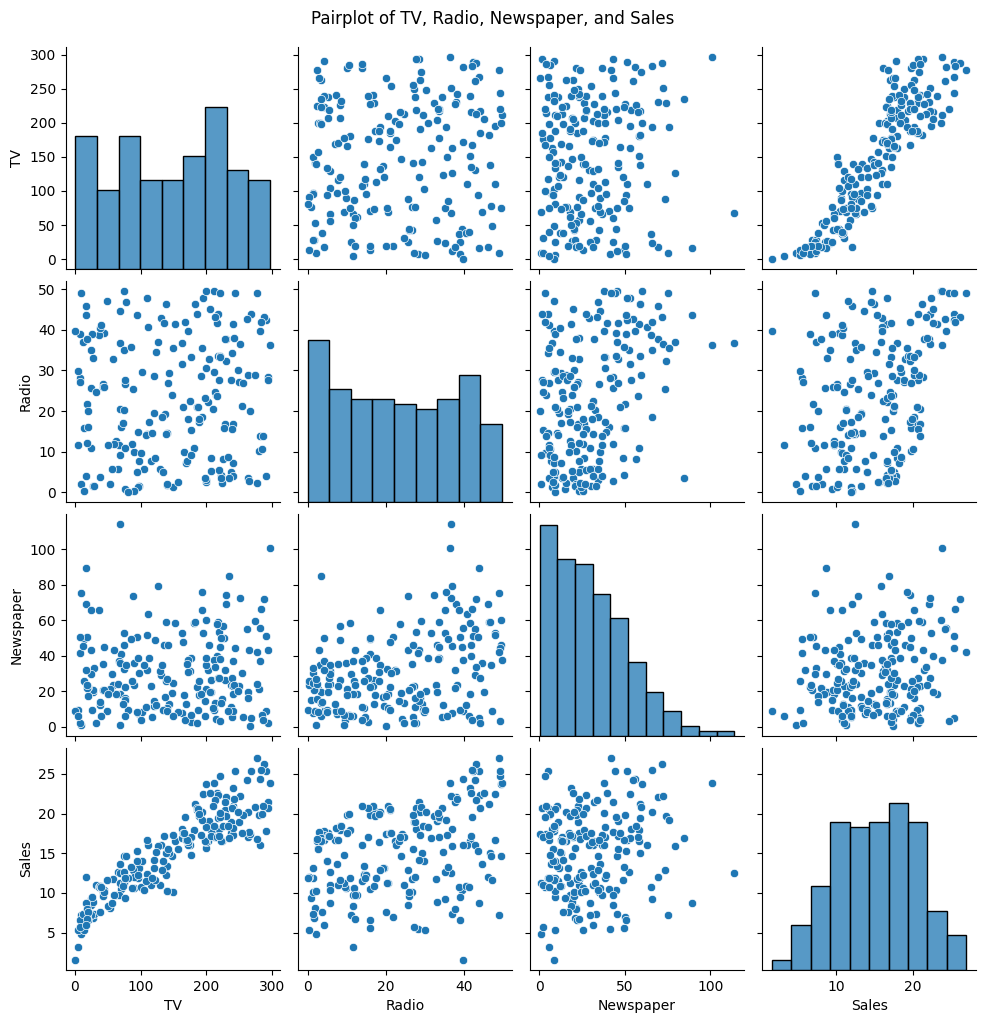

In [14]:
sns.pairplot(df)
plt.suptitle("Pairplot of TV, Radio, Newspaper, and Sales", y=1.02)
plt.show()


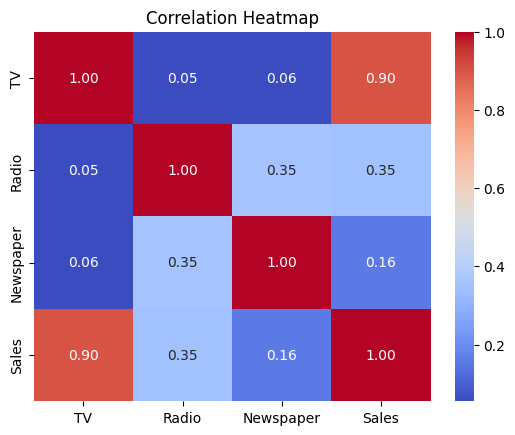

In [15]:
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


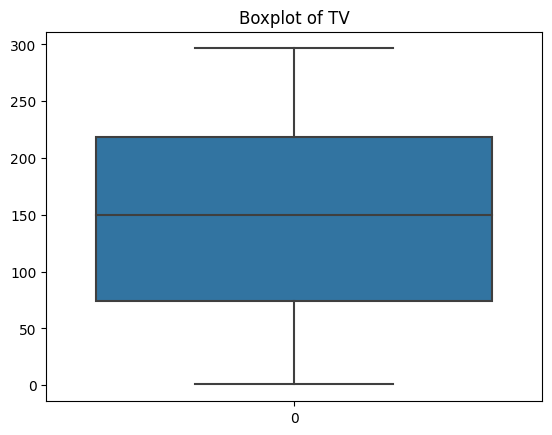

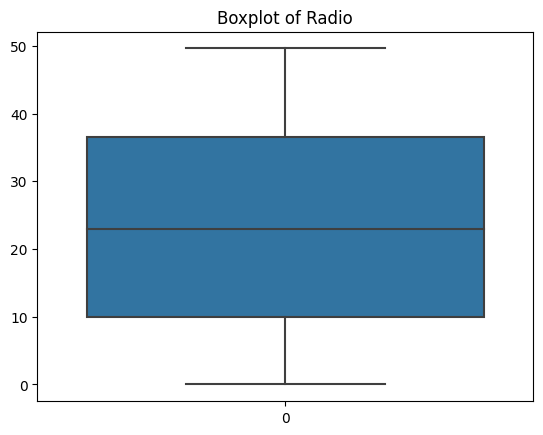

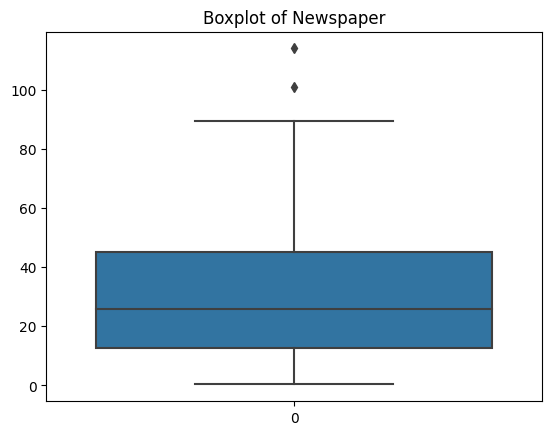

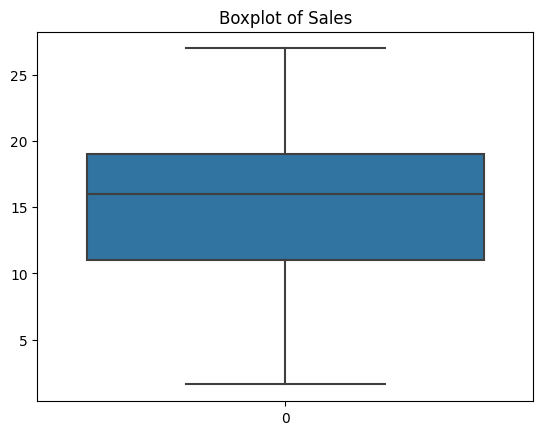

In [16]:
for column in ['TV', 'Radio', 'Newspaper', 'Sales']:
    sns.boxplot(data=df[column])
    plt.title(f"Boxplot of {column}")
    plt.show()


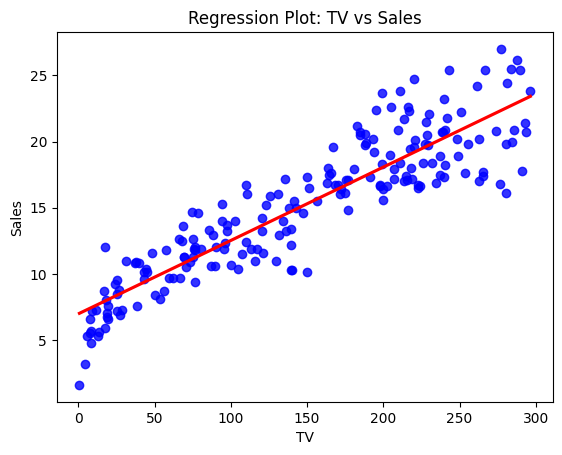

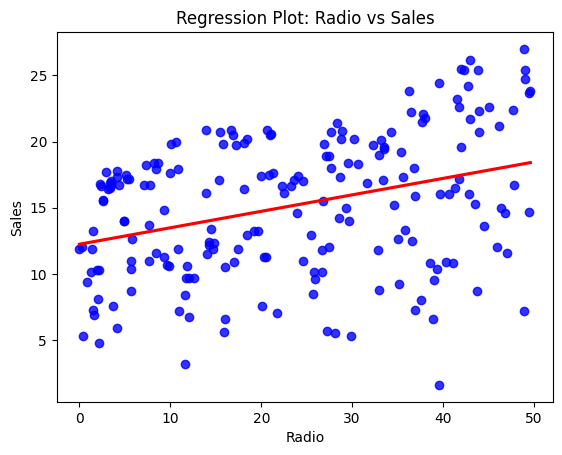

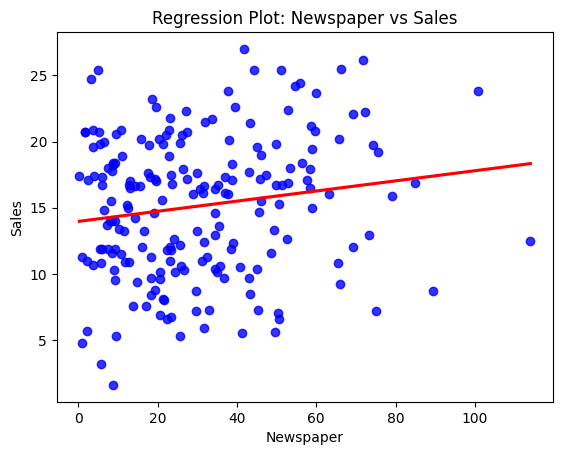

In [17]:
for column in ['TV', 'Radio', 'Newspaper']:
    sns.regplot(x=df[column], y=df['Sales'], ci=None, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
    plt.title(f"Regression Plot: {column} vs Sales")
    plt.xlabel(column)
    plt.ylabel("Sales")
    plt.show()


## Modelling

In [7]:
X=df.drop('Sales',axis=1)
y=df['Sales']

In [8]:
## Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [9]:
r2

0.9059011844150826

In [10]:
model.score(X_test,y_test)

0.9059011844150826